# Stock Market Analysis NSE

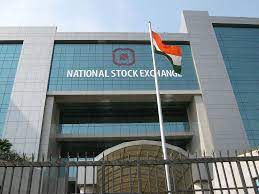




National Stock Exchange of India Limited (NSE) is the leading stock exchange of India, located in the city of Mumbai, Maharashtra. It is under the ownership of some leading financial institutions, Banks, and Insurance companies.NSE was established in 1992 as the first dematerialized electronic exchange in the country. NSE was the first exchange in the country to provide a modern, fully automated screen-based electronic trading system that offered easy trading facilities to investors spread across the length and breadth of the country.

National Stock Exchange has a total market capitalization of more than US$3 trillion, making it the world's 10th-largest stock exchange as of May 2021. NSE's flagship index, the NIFTY 50, a 50 stock index is used extensively by investors in India and around the world as a barometer of the Indian capital market. The NIFTY 50 index was launched in 1996 by NSE.

The companies taken are one among the top 5 companies in Nifty 50





**Importing important packages and yahoo for finance for NSE data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from pandas_datareader import data as pdr
try:
    import yfinance as yf    
except:
    !pip install yfinance    
    import yfinance as yf   

  Created wheel for yfinance: filename=yfinance-0.1.64-py2.py3-none-any.whl size=24109 sha256=8119bafa26560612a5306f56dd333c88228fbaaaf811d6322a521ab4d0b95684
  Stored in directory: /root/.cache/pip/wheels/86/fe/9b/a4d3d78796b699e37065e5b6c27b75cff448ddb8b24943c288
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8375 sha256=2add09d772dc02fdf0048baaed17be7a1ab622884d3ede80582abbbec7f87965
  Stored in directory: /root/.cache/pip/wheels/ae/25/47/4d68431a7ec1b6c4b5233365934b74c1d4e665bf5f968d363a
Successfully built yfinance multitasking


**Listing the stocks we want to analyze**

In [2]:
list = ['RELIANCE.NS','TCS.NS','HDFCBANK.NS','HINDUNILVR.NS']

**Putting the stocks in a dataframe**

In [3]:
data = pd.DataFrame()
for t in list:
    data[t] = pdr.DataReader(t, data_source='yahoo', start='2011-1-1')['Adj Close']

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2670 entries, 2011-01-03 to 2021-11-04
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RELIANCE.NS    2670 non-null   float64
 1   TCS.NS         2670 non-null   float64
 2   HDFCBANK.NS    2670 non-null   float64
 3   HINDUNILVR.NS  2670 non-null   float64
dtypes: float64(4)
memory usage: 104.3 KB


**Top 5 values from 2011-1-1**

In [5]:
data.head()

,RELIANCE.NS,TCS.NS,HDFCBANK.NS,HINDUNILVR.NS
Date,,,,
2011-01-03,478.549164,471.040771,222.243759,258.296082
2011-01-04,488.296021,465.630981,218.064758,264.688446
2011-01-05,487.706665,471.406769,214.592361,268.647736
2011-01-06,492.149506,476.592896,216.409897,264.564819
2011-01-07,482.991974,464.776917,210.989807,258.213593


**Normalalizing the data**

In [6]:
data.iloc[0]

RELIANCE.NS      478.549164
TCS.NS           471.040771
HDFCBANK.NS      222.243759
HINDUNILVR.NS    258.296082
Name: 2011-01-03 00:00:00, dtype: float64

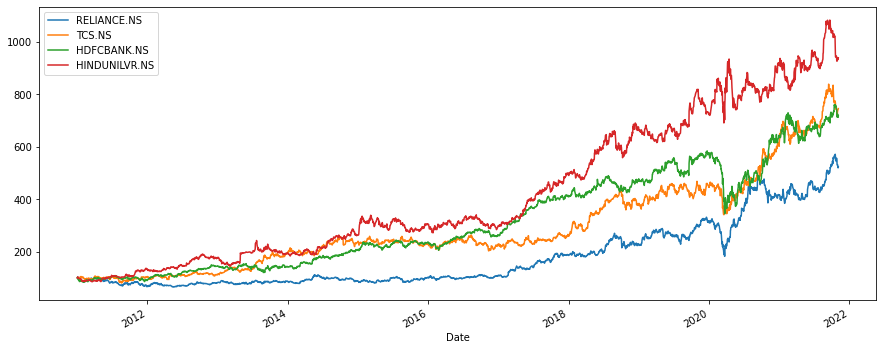

In [7]:
nd=(data / data.iloc[0] * 100)
nd.plot(figsize = (15, 6));
plt.show()

**Finding out the daily returns**

In [8]:
daily_returns = (data / data.shift(1)) - 1
daily_returns.head()

,RELIANCE.NS,TCS.NS,HDFCBANK.NS,HINDUNILVR.NS
Date,,,,
2011-01-03,NaN,NaN,NaN,NaN
2011-01-04,0.020368,-0.011485,-0.018804,0.024748
2011-01-05,-0.001207,0.012404,-0.015924,0.014958
2011-01-06,0.009110,0.011001,0.008470,-0.015198
2011-01-07,-0.018607,-0.024793,-0.025045,-0.024006


**Assigning equal weights of 25%to each stock**

In [9]:
weights = np.array([0.25, 0.25, 0.25, 0.25])

**Finding out the annual returns for a year**

In [10]:
annual_returns = daily_returns.mean() * 250
annual_returns

RELIANCE.NS      0.195778
TCS.NS           0.220946
HDFCBANK.NS      0.212614
HINDUNILVR.NS    0.238337
dtype: float64

**Percentage return of the portfolio of the 4 stocks**

In [11]:
(np.dot(annual_returns, weights))*100

21.691867615532455

# Thank You